In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib as plt

In [2]:
csv_df = pd.read_csv("hcvdat0.csv")
csv_df = csv_df.drop(['Unnamed: 0'],axis=1)
csv_df.head()



,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:
csv_df.info()
csv_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


(615, 13)

In [4]:
csv_df.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [5]:
import seaborn as sns

<Axes: title={'center': 'Missing values in percentage'}, ylabel='Percentage'>

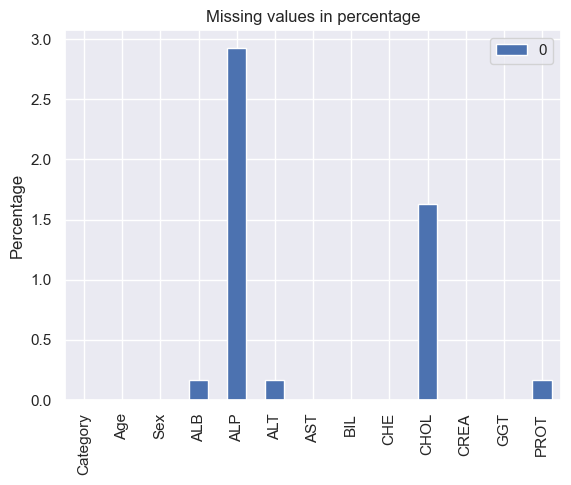

In [6]:
sns.set_theme()
missing_val_perc = pd.DataFrame((csv_df.isnull().sum()/len(csv_df))*100)
missing_val_perc.plot(kind='bar', title='Missing values in percentage', ylabel='Percentage')

In [7]:
print(f'Size of the dataset: {csv_df.shape}')

Size of the dataset: (615, 13)


In [8]:
def get_parameters(df):
    parameters = {}
    for col in df.columns[df.isnull().any()]:
        if df[col].dtypes in ['float64','int64','int32']:
            strategy = 'mean'
        else :
            strategy = 'most_frequent'
        missing_value = df[col][df[col].isnull()].values[0] if df[col].isnull().any() else None
        parameters[col] = {"missing_value": missing_value, "strategy": strategy}
    return parameters



In [9]:
get_parameters(csv_df)    

{'ALB': {'missing_value': nan, 'strategy': 'mean'},
 'ALP': {'missing_value': nan, 'strategy': 'mean'},
 'ALT': {'missing_value': nan, 'strategy': 'mean'},
 'CHOL': {'missing_value': nan, 'strategy': 'mean'},
 'PROT': {'missing_value': nan, 'strategy': 'mean'}}

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
missing_parameters = get_parameters(csv_df)

In [12]:
for col , para in missing_parameters.items():
    strategy = para['strategy']
    missing_value = para['missing_value']

    impute = SimpleImputer(strategy = strategy, missing_values=missing_value)
    csv_df[col] = impute.fit_transform(csv_df[[col]])

In [13]:
csv_df.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [14]:
csv_df.head(30)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
5,0=Blood Donor,32,m,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111.0,91.0,74.0
6,0=Blood Donor,32,m,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5
7,0=Blood Donor,32,m,42.2,41.9,35.8,31.1,16.1,5.82,4.60,109.0,21.5,67.1
8,0=Blood Donor,32,m,50.9,65.5,23.2,21.2,6.9,8.69,4.10,83.0,13.7,71.3
9,0=Blood Donor,32,m,42.4,86.3,20.3,20.0,35.2,5.46,4.45,81.0,15.9,69.9


In [15]:


# Apply one-hot encoding to the "Category" column
category_split = pd.get_dummies(csv_df["Category"], prefix="Category")

# Concatenate the original "Category" column with the encoded columns
csv_df = pd.concat([csv_df, category_split], axis=1)

# Print the updated DataFrame
csv_df.head()


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_0=Blood Donor,Category_0s=suspect Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,True,False,False,False,False
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,True,False,False,False,False
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,True,False,False,False,False
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,True,False,False,False,False
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,True,False,False,False,False


In [16]:
changed_val = ["0=Blood Donor", "0s=suspect Blood Donor", "1=Hepatitis", "2=Fibrosis", "3=Cirrhosis"]
num = ["0", "1", "2", "3", "4"]

for value, replacement in zip(changed_val, num):
    csv_df["Category"] = csv_df["Category"].str.replace(value, replacement)

csv_df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_0=Blood Donor,Category_0s=suspect Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis
0,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,True,False,False,False,False
1,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,True,False,False,False,False
2,0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,True,False,False,False,False
3,0,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,True,False,False,False,False
4,0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,True,False,False,False,False


In [17]:
male_female = ["m", "f"]
num_1 = ["0", "1"]

for value, replacement in zip(male_female, num_1):
    csv_df["Sex"] = csv_df["Sex"].str.replace(value, replacement)

csv_df.head(60)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_0=Blood Donor,Category_0s=suspect Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis
0,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,True,False,False,False,False
1,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,True,False,False,False,False
2,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,True,False,False,False,False
3,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,True,False,False,False,False
4,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,True,False,False,False,False
5,0,32,0,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111.0,91.0,74.0,True,False,False,False,False
6,0,32,0,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5,True,False,False,False,False
7,0,32,0,42.2,41.9,35.8,31.1,16.1,5.82,4.60,109.0,21.5,67.1,True,False,False,False,False
8,0,32,0,50.9,65.5,23.2,21.2,6.9,8.69,4.10,83.0,13.7,71.3,True,False,False,False,False
9,0,32,0,42.4,86.3,20.3,20.0,35.2,5.46,4.45,81.0,15.9,69.9,True,False,False,False,False


In [18]:
csv_df.rename(columns={"Category_0=Blood Donor":"Blood Donor","Category_0s=suspect Blood Donor":"Suspect Blood Donor","Category_1=Hepatitis":"Hepatitis","Category_2=Fibrosis":"Fibrosis","Category_3=Cirrhosis":"Cirrhosis"}, inplace=True)
csv_df.head(50)


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Blood Donor,Suspect Blood Donor,Hepatitis,Fibrosis,Cirrhosis
0,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,True,False,False,False,False
1,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,True,False,False,False,False
2,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,True,False,False,False,False
3,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,True,False,False,False,False
4,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,True,False,False,False,False
5,0,32,0,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111.0,91.0,74.0,True,False,False,False,False
6,0,32,0,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5,True,False,False,False,False
7,0,32,0,42.2,41.9,35.8,31.1,16.1,5.82,4.60,109.0,21.5,67.1,True,False,False,False,False
8,0,32,0,50.9,65.5,23.2,21.2,6.9,8.69,4.10,83.0,13.7,71.3,True,False,False,False,False
9,0,32,0,42.4,86.3,20.3,20.0,35.2,5.46,4.45,81.0,15.9,69.9,True,False,False,False,False
